# **Intelligent Image Classification_CNN**

In [6]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Important imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import  LabelBinarizer
from keras.preprocessing import image
from keras.preprocessing.image import img_to_array, array_to_img
from tensorflow.keras.optimizers import Adam
# from keras.optimizers import Adam
from PIL import Image
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
#from keras.layers.normalization import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense, LeakyReLU
from sklearn.model_selection import train_test_split

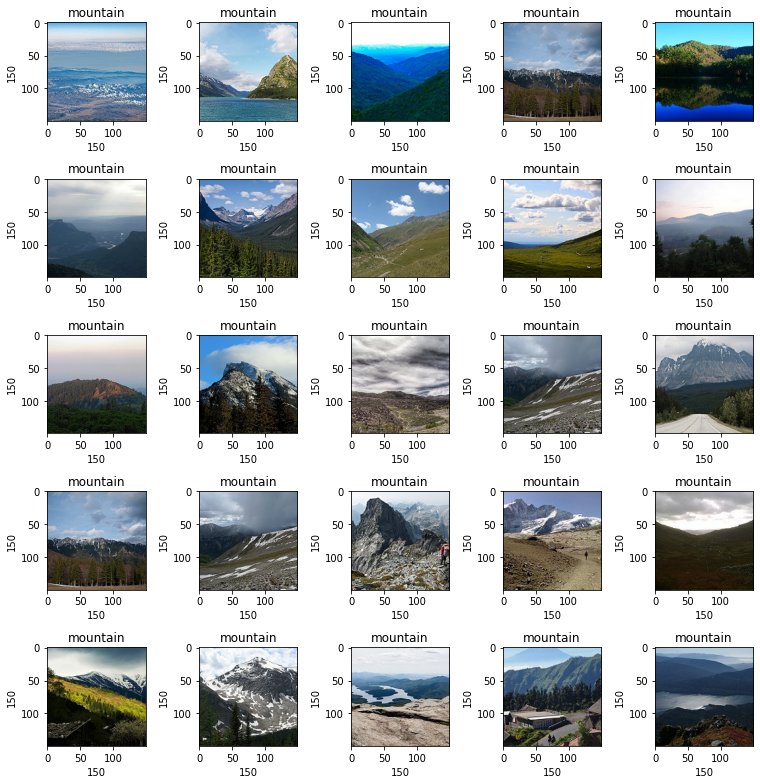

In [8]:
# Plotting 25 images to check dataset
plt.figure(figsize=(11,11))
path = "/content/drive/My Drive/Content/Intel Image Dataset/mountain"
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.tight_layout()
    rand_img = imread(path +'/'+ random.choice(sorted(listdir(path))))
    plt.imshow(rand_img)
    plt.title('mountain')
    plt.xlabel(rand_img.shape[1], fontsize = 10)
    plt.ylabel(rand_img.shape[0], fontsize = 10)

In [9]:
# Setting root directory path and creating empty list
dir = "/content/drive/My Drive/Content/Intel Image Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []

In [10]:
# Reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = Image.open(image_path)
    image = image.resize((150,150)) # All images does not have same dimension
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [11]:
# Visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

mountain     525
buildings    100
forest       100
glacier      100
sea          100
street       100
dtype: int64

In [12]:
# Checking count of classes
num_classes = len(label_counts)
num_classes

6

In [13]:
# Checking x data shape
np.array(image_list).shape

(1025, 150, 150, 3)

In [14]:
# Checking y data shape
label_list = np.array(label_list)
label_list.shape

(1025,)

In [15]:
# Splitting dataset into test and train
x_train, x_test, y_train, y_test = train_test_split(image_list, label_list, test_size=0.2, random_state = 10) 

In [16]:
# Normalize and reshape data
x_train = np.array(x_train, dtype=np.float16) / 225.0
x_test = np.array(x_test, dtype=np.float16) / 225.0
x_train = x_train.reshape( -1, 150,150,3)
x_test = x_test.reshape( -1, 150,150,3)

In [17]:
# Binarizing labels
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']


In [18]:
# Splitting the training data set into training and validation data sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.2)

In [19]:
# Creating model architecture
model = Sequential([
        Conv2D(16, kernel_size = (3,3), input_shape = (150,150,3)),
        BatchNormalization(),
        LeakyReLU(),
          
        Conv2D(32, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),
        
        Conv2D(64, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        
        Conv2D(128, kernel_size = (3,3)),
        BatchNormalization(),
        LeakyReLU(),
        MaxPooling2D(5,5),

        Flatten(),
    
        Dense(64),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
        
        Dense(32),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(),
    
        Dense(16),
        Dropout(rate = 0.2),
        BatchNormalization(),
        LeakyReLU(1),
    
        Dense(6, activation = 'softmax')    
        ])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 148, 148, 16)     64        
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 148, 148, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 146, 146, 32)     128       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 146, 146, 32)      0

In [20]:
# Compiling model
model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.0005),metrics=['accuracy'])

In [22]:
# Training the model
epochs = 10
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/10
6/6 [==============================] - 38s 6s/step - loss: 1.3033 - accuracy: 0.5488 - val_loss: 1.6602 - val_accuracy: 0.4451
Epoch 2/10
6/6 [==============================] - 41s 7s/step - loss: 1.1758 - accuracy: 0.6143 - val_loss: 1.6070 - val_accuracy: 0.4695
Epoch 3/10
6/6 [==============================] - 39s 6s/step - loss: 1.1013 - accuracy: 0.6723 - val_loss: 1.5807 - val_accuracy: 0.4695
Epoch 4/10
6/6 [==============================] - 42s 6s/step - loss: 1.0663 - accuracy: 0.6753 - val_loss: 1.5647 - val_accuracy: 0.4695
Epoch 5/10
6/6 [==============================] - 38s 6s/step - loss: 1.0236 - accuracy: 0.6662 - val_loss: 1.5431 - val_accuracy: 0.4695
Epoch 6/10
6/6 [==============================] - 39s 6s/step - loss: 0.9610 - accuracy: 0.7195 - val_loss: 1.5336 - val_accuracy: 0.4695
Epoch 7/10
6/6 [==============================] - 39s 6s/step - loss: 0.9137 - accuracy: 0.7424 - val_loss: 1.5363 - val_accuracy: 0.4695
Epoch 8/10
6/6 [==================

In [23]:
# Saving model
model.save("/content/drive/My Drive/Content/intel_image.h5")

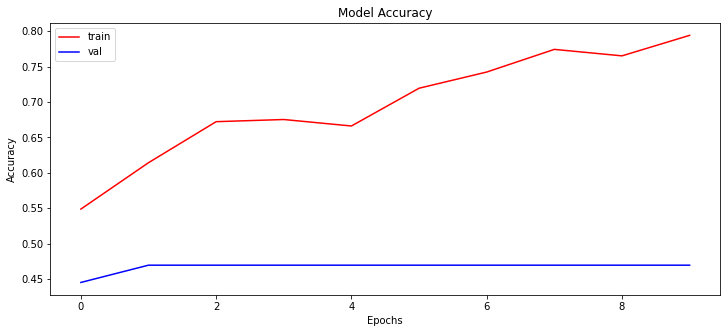

In [24]:
#Plot the training history
plt.figure(figsize=(12, 5))
plt.plot(history.history['accuracy'], color='r')
plt.plot(history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

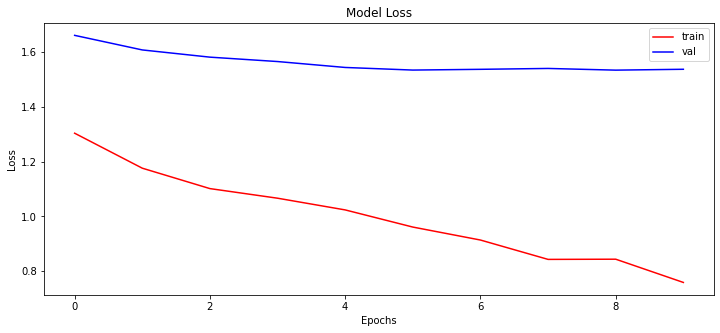

In [25]:
#Plot the loss history
plt.figure(figsize=(12, 5))
plt.plot(history.history['loss'], color='r')
plt.plot(history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'val'])
plt.show()

In [26]:
# Calculating test accuracy 
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

7/7 [==============================] - 3s 413ms/step - loss: 1.3719 - accuracy: 0.5512
Test Accuracy: 55.121952295303345


In [27]:
# Storing model predictions
y_pred = model.predict(x_test)

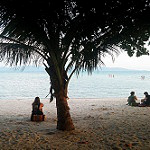

In [28]:
# Plotting image to compare
img = array_to_img(x_test[1])
img

In [29]:
# Finding max value from predition list and comaparing original value vs predicted
labels = lb.classes_
print(labels)
print("Originally : ",labels[np.argmax(y_test[1])])
print("Predicted : ",labels[np.argmax(y_pred[1])])

['buildings' 'forest' 'glacier' 'mountain' 'sea' 'street']
Originally :  sea
Predicted :  mountain
